In [112]:
#Libraries
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

from tqdm import tqdm
import requests



In [2]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv.gz')
streaks1 = pd.read_csv('streaks_augmented_20230817.csv.gz')

In [3]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [4]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [5]:
telemetry1.columns

Index(['EXPNUM', 'BAND', 'TELESCOP', 'OBSERVAT', 'INSTRUME', 'OBS-LONG',
       'OBS-LAT', 'OBS-ELEV', 'TELEQUIN', 'TIMESYS', 'DATE-OBS', 'TIME-OBS',
       'DARKTIME', 'EXPTIME', 'RA', 'DEC', 'AZ', 'ZD'],
      dtype='object')

In [6]:
expnum_counts = streaks1['expnum'].value_counts()
expnums_mas_8 = expnum_counts[expnum_counts > 8].index
streaks_filtradas = streaks1[streaks1['expnum'].isin(expnums_mas_8)]
telemetry1_filtrado = telemetry1[telemetry1['EXPNUM'].isin(streaks_filtradas['expnum'])]

In [7]:
streaks_filtradas

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879102,D01223533_g_c21_r6224p01_hstreak.fits,1,322.350759,322.367974,322.430509,322.413294,-19.778872,-19.762994,-19.822898,-19.838787,1223533,21,g
879103,D01223533_g_c27_r6224p01_hstreak.fits,1,321.914442,321.929370,322.039930,322.024991,-19.992600,-19.979549,-20.091439,-20.104500,1223533,27,g
879104,D01223533_g_c33_r6224p01_hstreak.fits,2,321.914515,321.920861,321.868432,321.862089,-20.207886,-20.214118,-20.261253,-20.255020,1223533,33,g
879105,D01223533_g_c44_r6224p01_hstreak.fits,1,323.071804,323.087515,323.208026,323.192338,-20.367516,-20.345896,-20.422967,-20.444584,1223533,44,g


In [8]:
telemetry1_filtrado

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
1849,145434,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 04:53:58.963709,04:53:58.963709,31.1660,30.0,00:03:06.361,-29:47:35.696,259.1000,37.55
1856,145505,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:18:03.596634,06:18:03.596634,61.1374,60.0,02:24:27.068,-04:16:03.299,307.0800,37.89
1866,145555,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:25:16.269456,07:25:16.269456,31.0896,30.0,04:34:13.969,15:11:05.500,341.6200,47.11
1867,145558,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:32:27.251025,07:32:27.251025,91.0933,90.0,04:34:13.530,15:11:02.098,339.3600,47.63
1868,145559,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 07:34:26.345592,07:34:26.345592,91.1038,90.0,04:35:39.350,14:51:01.199,339.0600,47.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504509,1223518,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:02:44.144925,04:02:44.144925,91.1284,90.0,20:12:31.741,-01:22:56.798,28.9529,32.15
504511,1223520,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:07:18.281902,04:07:18.281902,91.0861,90.0,20:41:41.381,-07:41:56.699,45.5025,29.97
504519,1223528,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:25:07.161563,04:25:07.161563,91.1412,90.0,21:22:27.278,-20:05:40.600,73.4940,26.26
504523,1223532,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:33:18.720174,04:33:18.720174,91.0856,90.0,21:32:30.502,-21:38:18.200,77.0527,25.96


In [9]:
expnum_counts[expnum_counts > 8] # How many times that exposure appear in the dataset

619360     61
189384     61
646812     61
1150145    61
193580     61
           ..
220686      9
915972      9
907578      9
420085      9
1069083     9
Name: expnum, Length: 38030, dtype: int64

In [20]:
expnums_mas_8 = expnum_counts[expnum_counts > 8].index.tolist() # Which are those exposures that have more than 8 streaks
#print(expnums_mas_8)

In [23]:
#expnumtry = telemetry1_filtrado['EXPNUM'].unique()  # Usaria toooooodos los datos filtrados :p
#expnumtry = telemetry1_filtrado['EXPNUM'].drop_duplicates().sample(10)     # Usando los datos filtrados
                                                                      # , random_state=42) # Random exposures
expnumtry = telemetry1['EXPNUM'].drop_duplicates().sample(100)  # Usando una muestra de los datos sin filtrar, para ver si hay mas starlinks con menos de 8 streaks

In [24]:
site = EarthLocation.of_site('ctio')

In [25]:
# Contenedores de resultados
expnum_starlink   = []   # exposures que tuvieron al menos 1 STARLINK
satmap_starlink   = []   # lista de nombres Starlink para cada exposure
satmap_completo   = {}  
todos_satelites = {} 
starlinks_en_exp = []
fov_radius=1

In [26]:
for exp in tqdm(expnumtry, desc="Buscando STARLINKs"):
    #fila = telemetry1_filtrado[telemetry1_filtrado['EXPNUM'] == exp].iloc[0] #row
    fila = telemetry1[telemetry1['EXPNUM'] == exp].iloc[0] #row

    #print(fila)
    try:
        ra = fila['RA']
        dec = fila['DEC']
        latitude = fila ['OBS-LAT']
        longitude = fila['OBS-LONG']
        elevation = fila['OBS-ELEV']
        exptime = fila['EXPTIME']
        timeobs = fila['TIME-OBS']
        dateobs = fila['DATE-OBS']
        duration = fila['EXPTIME']
        start_time_jd = Time(fila['DATE-OBS']).jd

        # Conversión de coordenadas y fecha
        coord = SkyCoord(ra=fila['RA'], dec=fila['DEC'], unit=u.deg)
        ra_center = coord.icrs.ra.value
        dec_center = coord.icrs.dec.value
        print(f"Running query for expnum{exp}")
        
        # URL para la API
        url = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()['data']['satellites']            
        
        # Guardar todos los satélites si quieres
        todos_satelites[exp] = list(data.keys())

        # Filtrar Starlink
        starlinks = [sat for sat in data if 'STARLINK' in sat.upper()]  # It was hard to find STARLINKs in a small sample, so I tried with COSMOS instead, they seem more common
        print(exp, starlinks)
        if starlinks:
            expnum_starlink.append(exp)
            starlinks_en_exp.append(starlinks)

    except Exception as e:
        print(f"⚠️ Error en expnum {exp}: {e}")
        continue

# Crear DataFrame con resultados
df_starlink = pd.DataFrame({
    'EXPNUM': expnum_starlink,
    'starlinks': starlinks_en_exp
})

# Vista rápida
print(df_starlink.head())

Buscando STARLINKs:   0%|                                                                      | 0/100 [00:00<?, ?it/s]

Running query for expnum636949


Buscando STARLINKs:   1%|▌                                                             | 1/100 [00:14<24:09, 14.64s/it]

636949 []
Running query for expnum153307


Buscando STARLINKs:   2%|█▏                                                            | 2/100 [00:20<15:34,  9.53s/it]

153307 []
Running query for expnum1165186


Buscando STARLINKs:   3%|█▊                                                            | 3/100 [00:36<19:52, 12.30s/it]

1165186 ['STARLINK-4599 (53631)']
Running query for expnum585202


Buscando STARLINKs:   4%|██▍                                                           | 4/100 [00:51<21:33, 13.47s/it]

585202 []
Running query for expnum335559


Buscando STARLINKs:   5%|███                                                           | 5/100 [00:57<16:53, 10.67s/it]

335559 []
Running query for expnum870595


Buscando STARLINKs:   6%|███▋                                                          | 6/100 [01:11<18:50, 12.02s/it]

870595 []
Running query for expnum1021893


Buscando STARLINKs:   7%|████▎                                                         | 7/100 [01:24<18:57, 12.23s/it]

1021893 []
Running query for expnum986426


Buscando STARLINKs:   8%|████▉                                                         | 8/100 [01:33<17:24, 11.36s/it]

986426 []
Running query for expnum1090345


Buscando STARLINKs:   9%|█████▌                                                        | 9/100 [01:44<16:51, 11.11s/it]

1090345 []
Running query for expnum981556


Buscando STARLINKs:  10%|██████                                                       | 10/100 [01:46<12:34,  8.38s/it]

981556 []
Running query for expnum922772


Buscando STARLINKs:  11%|██████▋                                                      | 11/100 [02:06<17:29, 11.80s/it]

922772 []
Running query for expnum611055


Buscando STARLINKs:  12%|███████▎                                                     | 12/100 [02:18<17:39, 12.03s/it]

611055 []
Running query for expnum826084


Buscando STARLINKs:  13%|███████▉                                                     | 13/100 [02:38<20:40, 14.26s/it]

826084 []
Running query for expnum606043


Buscando STARLINKs:  14%|████████▌                                                    | 14/100 [02:43<16:18, 11.38s/it]

606043 []
Running query for expnum163519


Buscando STARLINKs:  15%|█████████▏                                                   | 15/100 [02:51<14:59, 10.58s/it]

163519 []
Running query for expnum548311


Buscando STARLINKs:  16%|█████████▊                                                   | 16/100 [03:04<15:53, 11.35s/it]

548311 []
Running query for expnum980395


Buscando STARLINKs:  17%|██████████▎                                                  | 17/100 [03:07<12:01,  8.69s/it]

980395 []
Running query for expnum1112397


Buscando STARLINKs:  18%|██████████▉                                                  | 18/100 [03:22<14:21, 10.50s/it]

1112397 []
Running query for expnum582830


Buscando STARLINKs:  19%|███████████▌                                                 | 19/100 [03:31<13:38, 10.10s/it]

582830 []
Running query for expnum332882


Buscando STARLINKs:  20%|████████████▏                                                | 20/100 [03:38<12:31,  9.39s/it]

332882 []
Running query for expnum258837


Buscando STARLINKs:  21%|████████████▊                                                | 21/100 [03:54<14:43, 11.19s/it]

258837 []
Running query for expnum345332


Buscando STARLINKs:  22%|█████████████▍                                               | 22/100 [04:01<12:51,  9.89s/it]

345332 []
Running query for expnum736724


Buscando STARLINKs:  23%|██████████████                                               | 23/100 [04:20<16:08, 12.58s/it]

736724 []
Running query for expnum717345


Buscando STARLINKs:  24%|██████████████▋                                              | 24/100 [04:32<15:53, 12.55s/it]

717345 []
Running query for expnum609047


Buscando STARLINKs:  25%|███████████████▎                                             | 25/100 [04:39<13:34, 10.86s/it]

609047 []
Running query for expnum242046


Buscando STARLINKs:  26%|███████████████▊                                             | 26/100 [04:48<12:50, 10.41s/it]

242046 []
Running query for expnum179580


Buscando STARLINKs:  27%|████████████████▍                                            | 27/100 [04:56<11:40,  9.60s/it]

179580 []
Running query for expnum1019582


Buscando STARLINKs:  28%|█████████████████                                            | 28/100 [05:07<11:52,  9.90s/it]

1019582 []
Running query for expnum415507


Buscando STARLINKs:  29%|█████████████████▋                                           | 29/100 [05:19<12:33, 10.62s/it]

415507 []
Running query for expnum497856


Buscando STARLINKs:  30%|██████████████████▎                                          | 30/100 [05:36<14:33, 12.48s/it]

497856 []
Running query for expnum921497


Buscando STARLINKs:  31%|██████████████████▉                                          | 31/100 [05:59<18:10, 15.80s/it]

921497 []
Running query for expnum155705


Buscando STARLINKs:  32%|███████████████████▌                                         | 32/100 [06:07<15:01, 13.26s/it]

155705 []
Running query for expnum744123


Buscando STARLINKs:  33%|████████████████████▏                                        | 33/100 [06:18<14:17, 12.80s/it]

744123 []
Running query for expnum660402


Buscando STARLINKs:  34%|████████████████████▋                                        | 34/100 [06:37<16:00, 14.55s/it]

660402 []
Running query for expnum1037913


Buscando STARLINKs:  35%|█████████████████████▎                                       | 35/100 [06:50<15:12, 14.03s/it]

1037913 []
Running query for expnum840187


Buscando STARLINKs:  36%|█████████████████████▉                                       | 36/100 [07:09<16:40, 15.64s/it]

840187 []
Running query for expnum275840


Buscando STARLINKs:  37%|██████████████████████▌                                      | 37/100 [07:22<15:29, 14.76s/it]

275840 []
Running query for expnum336439


Buscando STARLINKs:  38%|███████████████████████▏                                     | 38/100 [07:35<14:41, 14.22s/it]

336439 []
Running query for expnum248774


Buscando STARLINKs:  39%|███████████████████████▊                                     | 39/100 [07:45<13:10, 12.95s/it]

248774 []
Running query for expnum1161606


Buscando STARLINKs:  40%|████████████████████████▍                                    | 40/100 [07:59<13:12, 13.21s/it]

1161606 ['STARLINK-4045 (53152)']
Running query for expnum1027021


Buscando STARLINKs:  41%|█████████████████████████                                    | 41/100 [08:03<10:29, 10.68s/it]

1027021 []
Running query for expnum567860


Buscando STARLINKs:  42%|█████████████████████████▌                                   | 42/100 [08:18<11:28, 11.87s/it]

567860 []
Running query for expnum852866


Buscando STARLINKs:  43%|██████████████████████████▏                                  | 43/100 [08:33<12:14, 12.88s/it]

852866 []
Running query for expnum1053329


Buscando STARLINKs:  44%|██████████████████████████▊                                  | 44/100 [08:45<11:46, 12.62s/it]

1053329 []
Running query for expnum277331


Buscando STARLINKs:  45%|███████████████████████████▍                                 | 45/100 [08:49<09:06,  9.93s/it]

277331 []
Running query for expnum731840


Buscando STARLINKs:  46%|████████████████████████████                                 | 46/100 [09:09<11:42, 13.01s/it]

731840 []
Running query for expnum1199116


Buscando STARLINKs:  47%|████████████████████████████▋                                | 47/100 [09:22<11:32, 13.06s/it]

1199116 []
Running query for expnum497764


Buscando STARLINKs:  48%|█████████████████████████████▎                               | 48/100 [09:40<12:35, 14.52s/it]

497764 []
Running query for expnum512542


Buscando STARLINKs:  49%|█████████████████████████████▉                               | 49/100 [09:54<12:09, 14.31s/it]

512542 []
Running query for expnum844131


Buscando STARLINKs:  50%|██████████████████████████████▌                              | 50/100 [10:10<12:20, 14.82s/it]

844131 []
Running query for expnum632309


Buscando STARLINKs:  51%|███████████████████████████████                              | 51/100 [10:28<12:52, 15.76s/it]

632309 []
Running query for expnum771604


Buscando STARLINKs:  52%|███████████████████████████████▋                             | 52/100 [10:45<12:47, 15.99s/it]

771604 []
Running query for expnum1049586


Buscando STARLINKs:  53%|████████████████████████████████▎                            | 53/100 [10:48<09:38, 12.30s/it]

1049586 []
Running query for expnum886454


Buscando STARLINKs:  54%|████████████████████████████████▉                            | 54/100 [11:09<11:22, 14.84s/it]

886454 []
Running query for expnum409227


Buscando STARLINKs:  55%|█████████████████████████████████▌                           | 55/100 [11:24<11:11, 14.92s/it]

409227 []
Running query for expnum193880


Buscando STARLINKs:  56%|██████████████████████████████████▏                          | 56/100 [11:41<11:18, 15.41s/it]

193880 []
Running query for expnum1035581


Buscando STARLINKs:  57%|██████████████████████████████████▊                          | 57/100 [11:47<09:01, 12.60s/it]

1035581 []
Running query for expnum496501


Buscando STARLINKs:  58%|███████████████████████████████████▍                         | 58/100 [11:50<06:57,  9.93s/it]

496501 []
Running query for expnum407785


Buscando STARLINKs:  59%|███████████████████████████████████▉                         | 59/100 [11:55<05:44,  8.41s/it]

407785 []
Running query for expnum481380


Buscando STARLINKs:  60%|████████████████████████████████████▌                        | 60/100 [12:02<05:13,  7.83s/it]

481380 []
Running query for expnum417439


Buscando STARLINKs:  61%|█████████████████████████████████████▏                       | 61/100 [12:06<04:20,  6.69s/it]

417439 []
Running query for expnum977176


Buscando STARLINKs:  62%|█████████████████████████████████████▊                       | 62/100 [12:13<04:24,  6.95s/it]

977176 []
Running query for expnum449803


Buscando STARLINKs:  63%|██████████████████████████████████████▍                      | 63/100 [12:27<05:28,  8.88s/it]

449803 []
Running query for expnum446249


Buscando STARLINKs:  64%|███████████████████████████████████████                      | 64/100 [12:29<04:11,  6.98s/it]

446249 []
Running query for expnum664603


Buscando STARLINKs:  65%|███████████████████████████████████████▋                     | 65/100 [12:47<05:55, 10.17s/it]

664603 []
Running query for expnum241812


Buscando STARLINKs:  66%|████████████████████████████████████████▎                    | 66/100 [12:56<05:38,  9.95s/it]

241812 []
Running query for expnum874602


Buscando STARLINKs:  67%|████████████████████████████████████████▊                    | 67/100 [13:05<05:15,  9.55s/it]

874602 []
Running query for expnum869896


Buscando STARLINKs:  68%|█████████████████████████████████████████▍                   | 68/100 [13:14<05:00,  9.40s/it]

869896 []
Running query for expnum815536


Buscando STARLINKs:  69%|██████████████████████████████████████████                   | 69/100 [13:28<05:35, 10.81s/it]

815536 []
Running query for expnum1180245


Buscando STARLINKs:  70%|██████████████████████████████████████████▋                  | 70/100 [13:48<06:43, 13.45s/it]

1180245 ['STARLINK-4137 (53031)']
Running query for expnum1045186


Buscando STARLINKs:  71%|███████████████████████████████████████████▎                 | 71/100 [13:55<05:39, 11.72s/it]

1045186 []
Running query for expnum158715


Buscando STARLINKs:  72%|███████████████████████████████████████████▉                 | 72/100 [14:05<05:08, 11.01s/it]

158715 []
Running query for expnum690030


Buscando STARLINKs:  73%|████████████████████████████████████████████▌                | 73/100 [14:23<05:56, 13.20s/it]

690030 []
Running query for expnum1065294


Buscando STARLINKs:  74%|█████████████████████████████████████████████▏               | 74/100 [14:35<05:35, 12.89s/it]

1065294 []
Running query for expnum334960


Buscando STARLINKs:  75%|█████████████████████████████████████████████▊               | 75/100 [14:49<05:29, 13.16s/it]

334960 []
Running query for expnum362531


Buscando STARLINKs:  76%|██████████████████████████████████████████████▎              | 76/100 [15:01<05:05, 12.73s/it]

362531 []
Running query for expnum185522


Buscando STARLINKs:  77%|██████████████████████████████████████████████▉              | 77/100 [15:11<04:35, 11.99s/it]

185522 []
Running query for expnum1150865


Buscando STARLINKs:  78%|███████████████████████████████████████████████▌             | 78/100 [15:25<04:35, 12.52s/it]

1150865 []
Running query for expnum239289


Buscando STARLINKs:  79%|████████████████████████████████████████████████▏            | 79/100 [15:31<03:41, 10.55s/it]

239289 []
Running query for expnum1021815


Buscando STARLINKs:  80%|████████████████████████████████████████████████▊            | 80/100 [15:40<03:21, 10.07s/it]

1021815 ['STARLINK-1133 (45064)']
Running query for expnum509119


Buscando STARLINKs:  81%|█████████████████████████████████████████████████▍           | 81/100 [15:56<03:44, 11.81s/it]

509119 []
Running query for expnum157026


Buscando STARLINKs:  82%|██████████████████████████████████████████████████           | 82/100 [16:00<02:55,  9.73s/it]

157026 []
Running query for expnum524049


Buscando STARLINKs:  83%|██████████████████████████████████████████████████▋          | 83/100 [16:16<03:13, 11.38s/it]

524049 []
Running query for expnum778766


Buscando STARLINKs:  84%|███████████████████████████████████████████████████▏         | 84/100 [16:34<03:33, 13.36s/it]

778766 []
Running query for expnum880806


Buscando STARLINKs:  85%|███████████████████████████████████████████████████▊         | 85/100 [16:47<03:22, 13.50s/it]

880806 []
Running query for expnum274743


Buscando STARLINKs:  86%|████████████████████████████████████████████████████▍        | 86/100 [16:58<02:57, 12.69s/it]

274743 []
Running query for expnum173781


Buscando STARLINKs:  87%|█████████████████████████████████████████████████████        | 87/100 [17:06<02:27, 11.33s/it]

173781 []
Running query for expnum925114


Buscando STARLINKs:  88%|█████████████████████████████████████████████████████▋       | 88/100 [17:29<02:54, 14.57s/it]

925114 []
Running query for expnum1037170


Buscando STARLINKs:  89%|██████████████████████████████████████████████████████▎      | 89/100 [17:41<02:32, 13.86s/it]

1037170 []
Running query for expnum188173


Buscando STARLINKs:  90%|██████████████████████████████████████████████████████▉      | 90/100 [17:45<01:48, 10.84s/it]

188173 []
Running query for expnum815182


Buscando STARLINKs:  91%|███████████████████████████████████████████████████████▌     | 91/100 [18:04<01:59, 13.32s/it]

815182 []
Running query for expnum512936


Buscando STARLINKs:  92%|████████████████████████████████████████████████████████     | 92/100 [18:07<01:22, 10.36s/it]

512936 []
Running query for expnum246911


Buscando STARLINKs:  93%|████████████████████████████████████████████████████████▋    | 93/100 [18:11<00:58,  8.36s/it]

246911 []
Running query for expnum644683


Buscando STARLINKs:  94%|█████████████████████████████████████████████████████████▎   | 94/100 [18:27<01:03, 10.61s/it]

644683 []
Running query for expnum388167


Buscando STARLINKs:  95%|█████████████████████████████████████████████████████████▉   | 95/100 [18:39<00:56, 11.21s/it]

388167 []
Running query for expnum225262


Buscando STARLINKs:  96%|██████████████████████████████████████████████████████████▌  | 96/100 [18:46<00:39,  9.93s/it]

225262 []
Running query for expnum528600


Buscando STARLINKs:  97%|███████████████████████████████████████████████████████████▏ | 97/100 [19:02<00:34, 11.65s/it]

528600 []
Running query for expnum1078652


Buscando STARLINKs:  98%|███████████████████████████████████████████████████████████▊ | 98/100 [19:12<00:22, 11.27s/it]

1078652 []
Running query for expnum447174


Buscando STARLINKs:  99%|████████████████████████████████████████████████████████████▍| 99/100 [19:24<00:11, 11.52s/it]

447174 []
Running query for expnum579135


Buscando STARLINKs: 100%|████████████████████████████████████████████████████████████| 100/100 [19:41<00:00, 11.82s/it]

579135 []
    EXPNUM                starlinks
0  1165186  [STARLINK-4599 (53631)]
1  1161606  [STARLINK-4045 (53152)]
2  1180245  [STARLINK-4137 (53031)]
3  1021815  [STARLINK-1133 (45064)]


In [27]:
df_starlink

,EXPNUM,starlinks
0,1165186,[STARLINK-4599 (53631)]
1,1161606,[STARLINK-4045 (53152)]
2,1180245,[STARLINK-4137 (53031)]
3,1021815,[STARLINK-1133 (45064)]


In [21]:
#todos_satelites

#### Some exposures with Starlinks(from the more than 8 streaks)

	1011967	[STARLINK-1963 (47564)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's image, there are two satellites)

	1220859	[STARLINK-3954 (52558)] Confirmed!  (Nothing at Alex's images)

	1103448	[STARLINK-3738 (52117)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's images looks amazing. 5 satellites)
    
    1114861 [STARLINK-1422 (45696)]
    
    1218180	[STARLINK-3210 (49755)]
    
  #### news (using the full telemetry data)

    1157371 [STARLINK-1569 (46039)',  'STARLINK-4093 (53157)',  'STARLINK-4257 (53184)']  Doesn't appear at the plot
     
    949790     [STARLINK-1255 (45399)]  Nothing at the plot

    1170668	[STARLINK-1601 (46120)]
 
    1106509	[STARLINK-3872 (52453)]
 
    1033925	[STARLINK-2559 (48298)]
    
    1132514	[STARLINK-3106 (49164)]
    
	1037961	[STARLINK-1712 (46581)]
    
	1226457	[STARLINK-5145 (54008)]  One Starlink at the plot!
        
	1085358	[STARLINK-2176 (47758)]
    
	1040356	[STARLINK-2566 (48287), STARLINK-2605 (48392)]  Doesn't appear at the plot
    
	1061946	[STARLINK-1324 (45574)]
    
    1165186  [STARLINK-4599 (53631)]
    
    1161606  [STARLINK-4045 (53152)]
    
    1180245  [STARLINK-4137 (53031)]
    
    1021815  [STARLINK-1133 (45064)]
    
  
    
#### Errors    
    
Exposure 157280 have an error with the url

Exposure 166858 have an error with the url

#### Questions

- It's possible that we are making a big restriction with the streaks restriction? (more than 8 streaks) 
- Are the STARLINK named with a different ID? Like SL?
- What's the meaning of the numbers of each satellite? STARLINK - ##### (*****)


Link of Search Satellite Database (it's correct?)

https://www.n2yo.com/satellites/?c=52

## Implementing as function

In [32]:
%who  

#all variables avaiables

EarthLocation	 Normalize	 Polygon	 ScalarMappable	 SkyCoord	 Time	 WCS	 coord	 data	 
dateobs	 dec	 dec_center	 df_starlink	 duration	 elevation	 exp	 expnum_counts	 expnum_starlink	 
expnums_mas_8	 expnumtry	 exptime	 fila	 find_satellites_in_decam_exp	 fov_radius	 go	 latitude	 longitude	 
np	 pd	 pio	 plt	 ra	 ra_center	 requests	 response	 run_satchecker_fov_query	 
satmap_completo	 satmap_starlink	 site	 starlinks	 starlinks_en_exp	 start_time_jd	 streaks1	 streaks_filtradas	 telemetry1	 
telemetry1_filtrado	 timeobs	 todos_satelites	 tqdm	 u	 url	 


In [103]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [104]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [115]:
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión/field of view(fov)."""
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}") 

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [132]:
def find_satellites_in_decam_exp(EXPNUM, name='STARLINK', fov=1.0, verbose=True):
    """
    Dada una exposición DECam (EXPNUM), consulta SatChecker y devuelve los satélites
    cuyo nombre contenga 'name' (por defecto STARLINK) que cruzan el campo de visión.
    """
    if EXPNUM not in telemetry1['EXPNUM'].values:  #verifica que exista el expnum
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    #ubication and duration
    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    # Convierte automaticamente horas a grados, si se deja como hora, da error
    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

        
    #SatChecker consult (defined previously)    
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    if name:
        named = {k: v for k, v in sats.items() if name.upper() in k.upper()}
    else:
        named = sats
    
    #Filtrando por nombres del satelite, each satelite is called k
    named = {k: v for k, v in sats.items() if name.upper() in k.upper()}  # .upper para ponerlo todo en mayusculas
        

    # data resume
    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(named)} satélites con nombre '{name}' encontrados.\n")

    return named


In [133]:
def plot_satellites_in_exposure(EXPNUM, name='STARLINK', fov_radius=1.0):
    sats = find_satellites_in_decam_exp(EXPNUM, name=name, fov=fov_radius, verbose=True) # va a filtrar solo los starlink
    
    if not sats:   #si no hay starlinks, no los grafica
        print("No se encontraron satélites para graficar.")
        return
    
    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]
    
    
    #ra y dec en coordenadas amigables
    coord = SkyCoord(ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)) if ':' in str(row['RA']) else SkyCoord(ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg)
    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd

    # Configuración de WCS (proyección del cielo en la gráfica)
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center] #centro de la imagen
    wcs.wcs.cdelt = [0.1, 0.1]  # zoom de la imagen/tamaño de pixel
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    # Plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # Campo de visión
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))

    # Trayectorias de los satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]
        times = [p[2] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiquetar cada satélite
        if coords.ra.deg[0] < coords.ra.deg[-1]:
            ax.text(coords.ra.deg[0], coords.dec.deg[0], sat_name, transform=ax.get_transform('world'), fontsize=6)
        else:
            ax.text(coords.ra.deg[-1], coords.dec.deg[-1], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.show()



Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2460155.4759624195&duration=142.0&ra=190.69321666666664&dec=-20.17613888888889&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['CANX-6 (32784)', 'COSMOS 1703 (16262)', 'NOAA 13 (22739)', 'SL-14 R/B (19337)', 'STARLINK-4330 (53080)', 'STARLINK-5077 (55391)']

EXPNUM: 1226457
DATE-OBS: 2023-07-29 23:25:23.153033 | Duración: 142.0 s
RA: 190.693 deg | DEC: -20.176 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



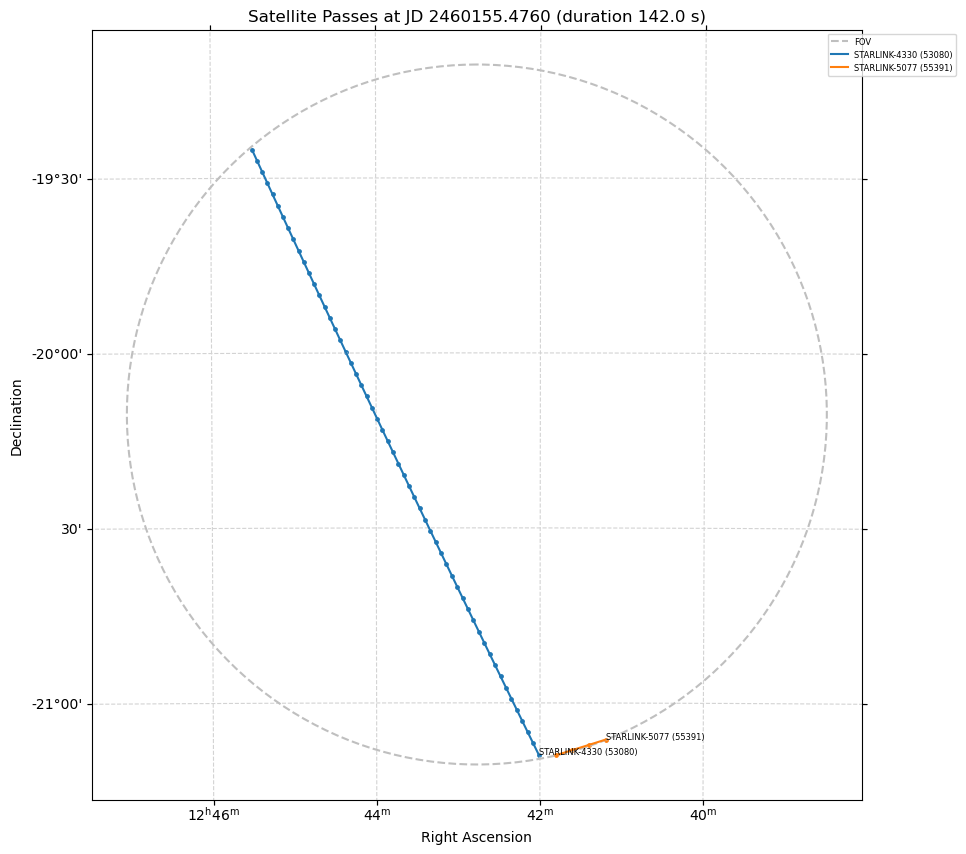

In [134]:
plot_satellites_in_exposure(1226457)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459492.783420907&duration=50.0&ra=35.660533333333326&dec=-7.5966661111111105&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['ONEWEB-0214 (48788)', 'ONEWEB-0224 (48794)', 'SL-3 R/B (4420)', 'STARLINK-1237 (45192)', 'STARLINK-2464 (48123)']

EXPNUM: 1040356
DATE-OBS: 2021-10-05 06:48:07.566372 | Duración: 50.0 s
RA: 35.661 deg | DEC: -7.597 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



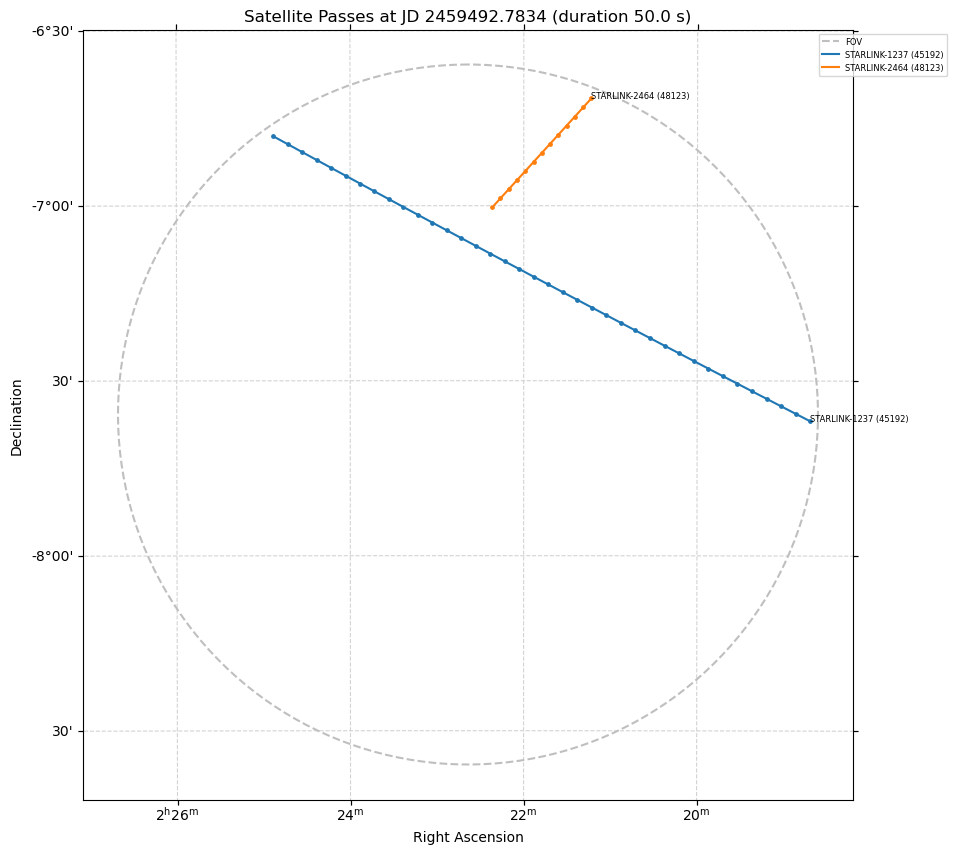

In [135]:
plot_satellites_in_exposure(1040356)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459947.7147467905&duration=50.0&ra=115.81062083333332&dec=-1.098806111111111&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['SL-14 R/B (15100)', 'STARLINK-3048 (49148)', 'STARLINK-3194 (49758)']

EXPNUM: 1161606
DATE-OBS: 2023-01-03 05:09:14.122691 | Duración: 50.0 s
RA: 115.811 deg | DEC: -1.099 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



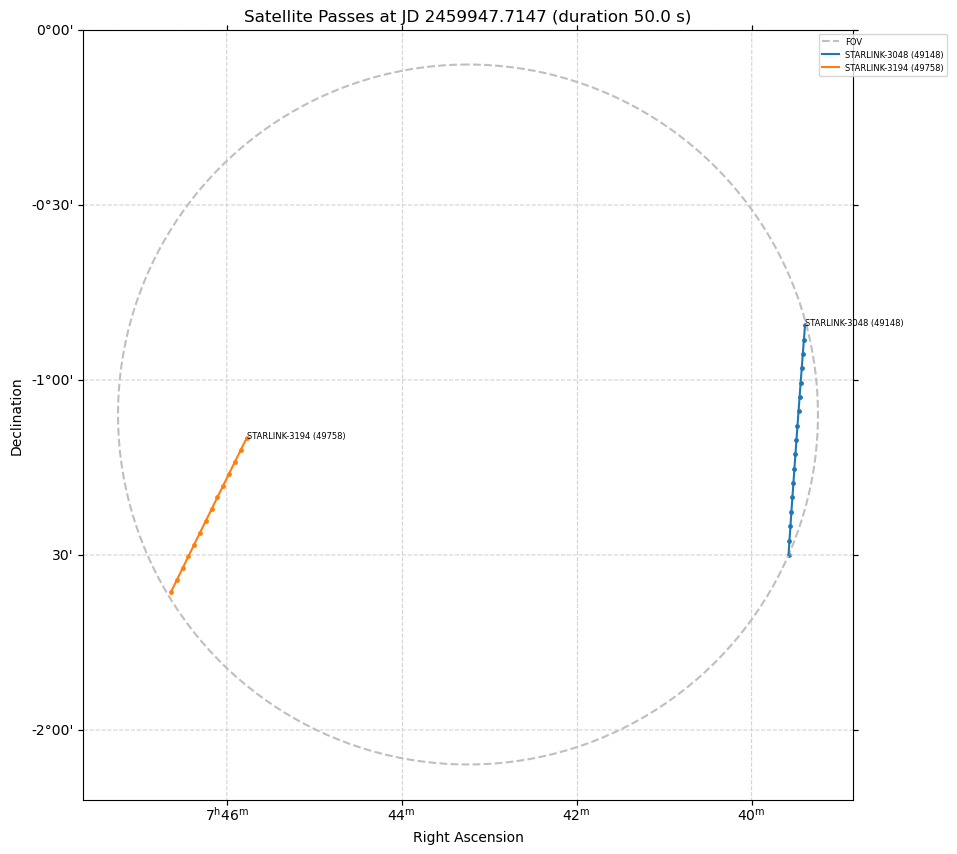

In [136]:
plot_satellites_in_exposure(1161606)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459642.554146692&duration=100.0&ra=158.21890416666665&dec=-58.679386944444445&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['STARLINK-1700 (46549)', 'STARLINK-2344 (47885)']

EXPNUM: 1085358
DATE-OBS: 2022-03-04 01:17:58.27419 | Duración: 100.0 s
RA: 158.219 deg | DEC: -58.679 deg | FOV: 1.0°
2 satélites con nombre 'STARLINK' encontrados.



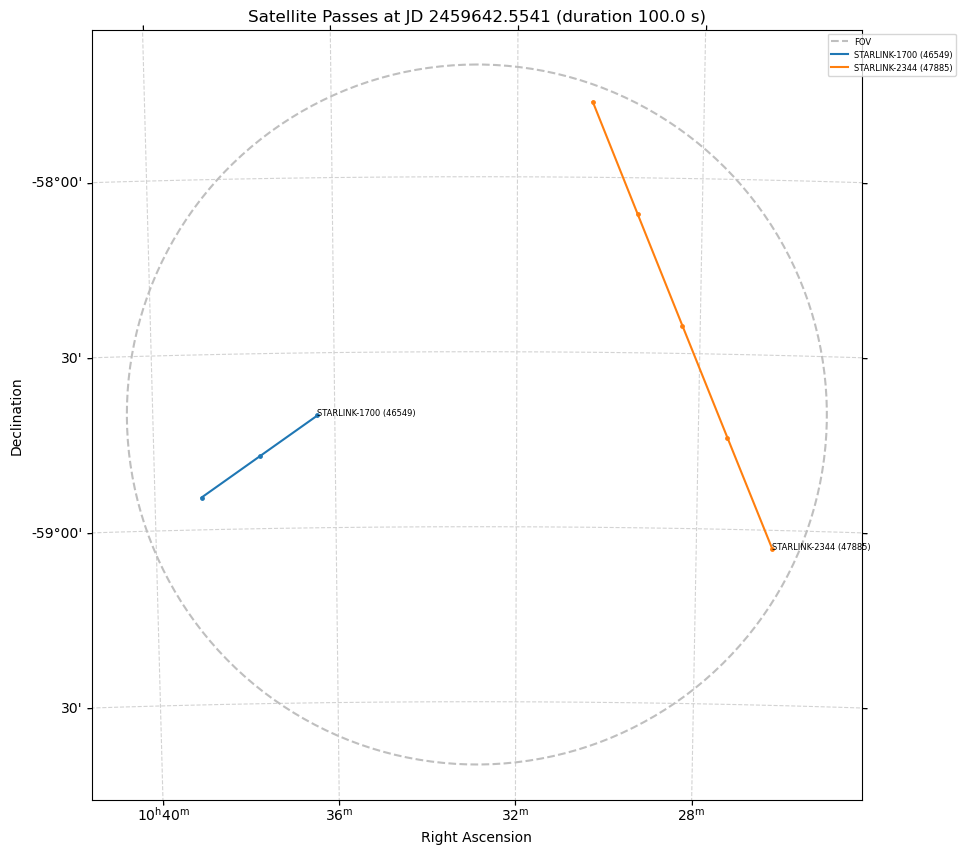

In [137]:
plot_satellites_in_exposure(1085358)